In [398]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [81]:
feature_df=pd.read_csv('smiles_features.csv')
feature_df.head()

,Unnamed: 0,SMILES,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 1018,Feature 1019,Feature 1020,Feature 1021,Feature 1022,Feature 1023,Feature 1024,moa,Compound ID,moa_encoded
0,0,CC(C)OC(=O)C1=C(C)NC(N)=C(C1c1cccc(c1)[N+]([O-...,0.006566,-0.005034,-0.003473,-0.022442,-0.003635,0.009503,-0.019718,-0.015931,...,0.006121,-0.015934,0.006561,0.006683,-0.001176,-0.011793,-0.009919,calcium channel blocker,CBK290879,7
1,1,CCCC(=O)OCOC(=O)C1=C(C)NC(C)=C(C1c1cccc(Cl)c1C...,0.014728,0.003271,-0.005368,-0.022826,-0.010694,0.003062,-0.025592,-0.005830,...,0.011623,-0.013985,0.008661,0.000595,-0.001549,-0.010709,-0.004137,calcium channel blocker,CBK290930,7
2,2,CCOC(=O)C1=C(C)NC(C)=C(C1c1cccc(c1)[N+]([O-])=...,0.013733,-0.009632,-0.009149,-0.030649,-0.010925,0.005151,-0.023974,-0.008834,...,0.012263,-0.010157,0.009356,0.004936,-0.001017,-0.009455,-0.007499,calcium channel blocker,CBK024692,7
3,3,COCCOC(=O)C1=C(C)NC(C)=C(C(=O)OC/C=C/c2ccccc2)...,0.009857,-0.000055,-0.006935,-0.014000,-0.003570,0.019046,-0.017936,-0.015631,...,0.002550,-0.002987,0.009370,0.010735,-0.010032,-0.022624,0.002226,calcium channel blocker,CBK200562,7
4,4,CC(Cc1ccccc1)NCCC(c1ccccc1)c1ccccc1,-0.011794,-0.007284,0.007871,-0.002002,-0.003065,0.013388,-0.012115,-0.026655,...,0.000414,-0.022343,-0.002310,0.012603,0.012356,-0.008417,-0.005591,calcium channel blocker,CBK200741,7


In [82]:
num_df=feature_df.drop(columns=['Unnamed: 0','SMILES','moa','Compound ID','moa_encoded'])
num_df.head(1)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 1015,Feature 1016,Feature 1017,Feature 1018,Feature 1019,Feature 1020,Feature 1021,Feature 1022,Feature 1023,Feature 1024
0,0.006566,-0.005034,-0.003473,-0.022442,-0.003635,0.009503,-0.019718,-0.015931,0.017768,-0.011293,...,0.006296,0.010241,-0.010061,0.006121,-0.015934,0.006561,0.006683,-0.001176,-0.011793,-0.009919


In [227]:
num_df_s=scaler.fit_transform(num_df)

In [234]:
num_df_s=pd.DataFrame(num_df_s)

In [85]:
feature_df.shape

(2465, 1029)

In [17]:
batch_ids_by_class = feature_df.groupby('moa_encoded')['Compound ID'].unique().to_dict()

# Step 2: Create a dictionary to hold train and test batch_ids
train_batches = []
test_batches = []

# Step 3: Split each class into train and test while ensuring batch_ids do not overlap
for moa_class, batch_ids in batch_ids_by_class.items():
    train, test = train_test_split(batch_ids, test_size=0.2, random_state=42)
    train_batches.extend(train)
    test_batches.extend(test)

# Step 4: Create the train and test DataFrames based on batch_ids
train_df = feature_df[feature_df['Compound ID'].isin(train_batches)].reset_index(drop=True)
test_df = feature_df[feature_df['Compound ID'].isin(test_batches)].reset_index(drop=True)

In [18]:
batch_ids_by_class = train_df.groupby('moa_encoded')['Compound ID'].unique().to_dict()

# Step 2: Create a dictionary to hold train and validation batch_ids
train_batches = []
val_batches = []


for moa_class, batch_ids in batch_ids_by_class.items():
    train, val = train_test_split(batch_ids, test_size=0.2, random_state=42)
    train_batches.extend(train)
    val_batches.extend(val)

train_final_df = train_df[train_df['Compound ID'].isin(train_batches)].reset_index(drop=True)
val_df = train_df[train_df['Compound ID'].isin(val_batches)].reset_index(drop=True)

In [20]:
train_final_df.head(1)

,Unnamed: 0,SMILES,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 1018,Feature 1019,Feature 1020,Feature 1021,Feature 1022,Feature 1023,Feature 1024,moa,Compound ID,moa_encoded
0,0,CC(C)OC(=O)C1=C(C)NC(N)=C(C1c1cccc(c1)[N+]([O-...,0.006566,-0.005034,-0.003473,-0.022442,-0.003635,0.009503,-0.019718,-0.015931,...,0.006121,-0.015934,0.006561,0.006683,-0.001176,-0.011793,-0.009919,calcium channel blocker,CBK290879,7


In [21]:
train_final_df=train_final_df.drop(columns=['Compound ID','SMILES','Unnamed: 0','moa','Compound ID'],inplace=False)
val_df=val_df.drop(columns=['Compound ID','SMILES','Unnamed: 0','moa','Compound ID'],inplace=False)
test_df=test_df.drop(columns=['Compound ID','SMILES','Unnamed: 0','moa','Compound ID'],inplace=False)

In [22]:
train_ae=train_final_df.drop(columns=['moa_encoded'],inplace=False)
val_ae=val_df.drop(columns=['moa_encoded'],inplace=False)
test_ae=test_df.drop(columns=['moa_encoded'],inplace=False)


In [41]:
scaler=StandardScaler()
train_s=scaler.fit_transform(train_ae)
val_s=scaler.transform(val_ae)
val_s=pd.DataFrame(val_s)
train_s=pd.DataFrame(train_s)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader,TensorDataset

In [228]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, latent_dim)  # Latent representation
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim)  # Reconstructed output
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed
def train_epoch(autoencoder, train_loader, optimizer, criterion, device):
    autoencoder.train()
    total_loss = 0
    for batch in train_loader:
        inputs = batch[0].to(device)  # Extract tensor from tuple and move to device
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def validate(autoencoder, val_loader, criterion, device):
    autoencoder.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            val_inputs = batch[0].to(device)  # Extract tensor from tuple and move to device
            val_outputs = autoencoder(val_inputs)
            total_loss += criterion(val_outputs, val_inputs).item()
    return total_loss / len(val_loader)

input_dim = 1024 
latent_dim = 256 
learning_rate = 0.001
num_epochs = 100
batch_size = 128
train_data = torch.tensor(train_s.values, dtype=torch.float32)
val_data = torch.tensor(val_s.values, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(train_data,), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(val_data,), batch_size=batch_size, shuffle=False)

# Initialize the autoencoder, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
autoencoder = Autoencoder(input_dim, latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Early Stopping Variables
best_val_loss = float('inf')
patience_counter = 0
patience = 7

Epoch [1/100], Train Loss: 0.7521, Validation Loss: 0.5348
Epoch [2/100], Train Loss: 0.4266, Validation Loss: 0.3794
Epoch [3/100], Train Loss: 0.3117, Validation Loss: 0.3043
Epoch [4/100], Train Loss: 0.2471, Validation Loss: 0.2567
Epoch [5/100], Train Loss: 0.2056, Validation Loss: 0.2270
Epoch [6/100], Train Loss: 0.1774, Validation Loss: 0.2086
Epoch [7/100], Train Loss: 0.1574, Validation Loss: 0.1944
Epoch [8/100], Train Loss: 0.1421, Validation Loss: 0.1819
Epoch [9/100], Train Loss: 0.1291, Validation Loss: 0.1723
Epoch [10/100], Train Loss: 0.1185, Validation Loss: 0.1639
Epoch [11/100], Train Loss: 0.1102, Validation Loss: 0.1580
Epoch [12/100], Train Loss: 0.1033, Validation Loss: 0.1523
Epoch [13/100], Train Loss: 0.0971, Validation Loss: 0.1476
Epoch [14/100], Train Loss: 0.0915, Validation Loss: 0.1435
Epoch [15/100], Train Loss: 0.0866, Validation Loss: 0.1403
Epoch [16/100], Train Loss: 0.0824, Validation Loss: 0.1363
Epoch [17/100], Train Loss: 0.0789, Validation Lo

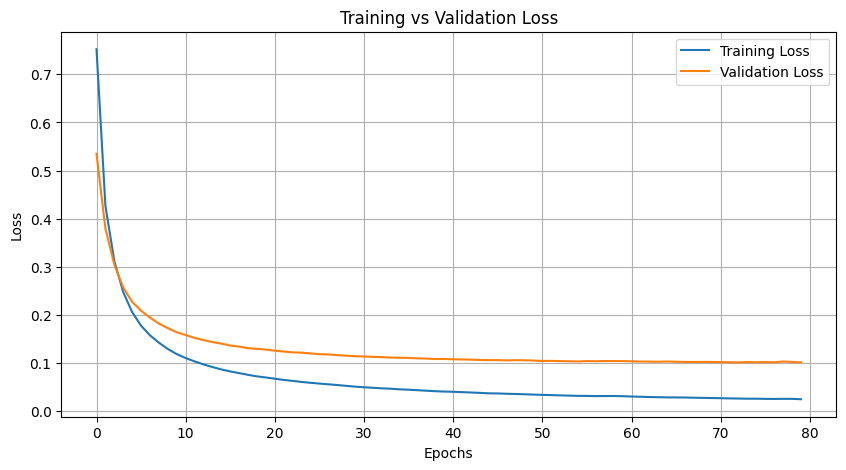

In [229]:


# Early Stopping Variables
best_val_loss = float('inf')
patience_counter = 0
patience = 7

# Lists to store losses for plotting
train_losses = []
val_losses = []

# Training the autoencoder with early stopping
for epoch in range(num_epochs):
    train_loss = train_epoch(autoencoder, train_loader, optimizer, criterion,device)
    val_loss = validate(autoencoder, val_loader, criterion,device)

    # Store the losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Check for improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset patience counter
        #print("Validation loss improved. Saving model...")
        #torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')  # Save the model
    else:
        patience_counter += 1

    # Early stopping check
    if patience_counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs.')
        break

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [230]:
def compute_reconstruction_loss(autoencoder, data_loader, criterion, device):
    autoencoder.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch[0].to(device)  # Extract tensor and move to device
            outputs = autoencoder(inputs)  # Get reconstructed output
            loss = criterion(outputs, inputs)  # Compute MSE loss
            total_loss += loss.item()
    return total_loss / len(data_loader)

In [231]:
train_recon_loss = compute_reconstruction_loss(autoencoder, train_loader, criterion, device)
val_recon_loss = compute_reconstruction_loss(autoencoder, val_loader, criterion, device)

print(f"Final Training Reconstruction Loss: {train_recon_loss:.4f}")
print(f"Final Validation Reconstruction Loss: {val_recon_loss:.4f}")

Final Training Reconstruction Loss: 0.0237
Final Validation Reconstruction Loss: 0.1013


In [235]:
dataset = torch.tensor(num_df_s.values, dtype=torch.float32).to(device)
encoder = autoencoder.encoder 
# Put encoder in evaluation mode
encoder.eval()

# Disable gradients for efficiency
with torch.no_grad():
    reduced_data = encoder(dataset)  # Get the latent space representation

# Convert back to Pandas DataFrame (optional)
reduced_df = pd.DataFrame(reduced_data.cpu().numpy())

# Display the transformed dataset
print(reduced_df.shape)  # Should be (num_samples, latent_dim)
print(reduced_df.head())

(2465, 256)
        0         1         2         3         4         5         6    \
0 -1.260669  1.088168 -0.721876  0.473105 -2.231139 -0.587005  0.168915   
1  0.194409  1.476025 -1.128567 -0.902497  0.629718 -0.452679 -0.232242   
2 -0.907791  0.986471 -0.730928 -0.343240 -0.505258 -0.186421  0.896198   
3 -0.298268  0.630074  0.593894 -0.034532 -2.567420  1.123119  1.274928   
4  0.367927 -1.549409 -0.289119  3.639184 -3.627851 -2.229733  1.384131   

        7         8         9    ...       246       247       248       249  \
0  0.623000 -0.057810  1.112954  ... -0.343388 -0.750451  0.910752  0.348750   
1 -1.544049 -0.561009 -1.500787  ...  0.861719  0.688261  0.629214  0.929155   
2 -1.003870  0.114388 -1.851584  ...  0.311816  0.694859  0.481595  1.940091   
3 -0.172411 -0.382398 -0.043862  ... -0.913485  0.899828 -0.094328  0.909568   
4  3.209716 -2.672189  4.074334  ... -0.789756 -0.384451  3.416758 -2.001636   

        250       251       252       253       254     

In [236]:
reduced_data=pd.DataFrame(reduced_df)

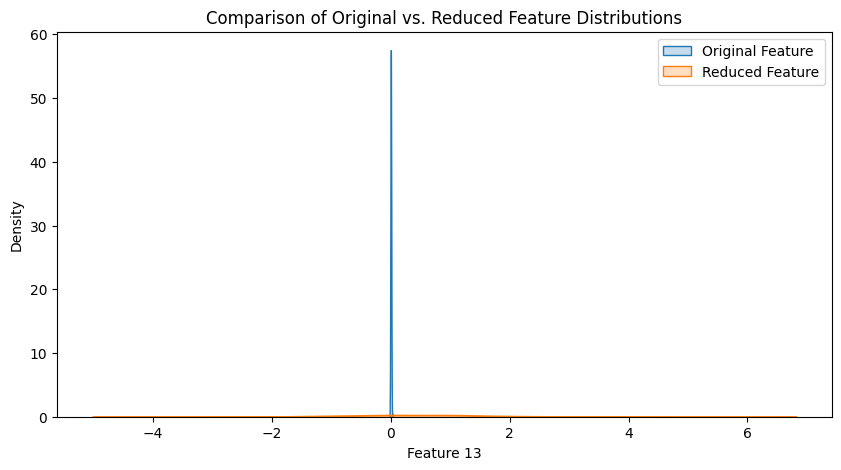

In [239]:
import seaborn as sns

original_feature = num_df.iloc[:, 12]  
latent_feature = reduced_df.iloc[:,12]  

# Plot distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(original_feature, label='Original Feature', fill=True)
sns.kdeplot(latent_feature, label='Reduced Feature', fill=True)
plt.legend()
plt.title("Comparison of Original vs. Reduced Feature Distributions")
plt.show()


In [ ]:
#scale the data check KL divergence,

In [381]:
#class Autoencoder(nn.Module):
#    def __init__(self, input_dim, latent_dim):
#        super(Autoencoder, self).__init__()
#        # Encoder with BatchNorm and dropout in the encoder
#        self.encoder = nn.Sequential(
#            nn.Linear(input_dim, 512),
#            nn.ReLU(0.1),
#            #nn.BatchNorm1d(512),
#            nn.Dropout(0.3),
#            nn.Linear(512, latent_dim),
#            nn.ReLU(0.1)  # Latent space activation
#        )
#        # Decoder with BatchNorm and no dropout
#        self.decoder = nn.Sequential(
#            nn.Linear(latent_dim, 512),
#            nn.ReLU(0.1),
#            #nn.BatchNorm1d(512),
#            nn.Linear(512, input_dim),
#            #nn.Sigmoid()  # Apply Sigmoid if your data is in the [0, 1] range
#        )
#
#    def forward(self, x):
#        latent = self.encoder(x)
#        reconstructed = self.decoder(latent)
#        return reconstructed
#
## Hyperparameters
#input_dim = 1024
#latent_dim = 512  # Increased latent_dim
#learning_rate = 0.0005  # Reduced learning rate
#
## Initialize model, loss, and optimizer
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#autoencoder = Autoencoder(input_dim, latent_dim).to(device)
#criterion = nn.MSELoss()  # Switched to MSELoss
#optimizer = optim.AdamW(autoencoder.parameters(), lr=learning_rate, weight_decay=1e-4)

class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder with BatchNorm and dropout in the encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),  # Changed ReLU(0.1) to LeakyReLU
            nn.BatchNorm1d(512),  # Re-enabled BatchNorm
            nn.Dropout(0.1),  # Reduced dropout
            nn.Linear(512, latent_dim),
            #nn.Tanh()  # Changed from ReLU to Tanh
        )
        # Decoder with BatchNorm
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Linear(512, input_dim),
            #nn.Identity()  # Output remains unbounded since data is standardized
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed

# Hyperparameters
input_dim = 1024
latent_dim = 512  
learning_rate = 0.001  # Increased LR

# Initialize model, loss, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
autoencoder = Autoencoder(input_dim, latent_dim).to(device)
criterion = nn.MSELoss()  
optimizer = optim.AdamW(autoencoder.parameters(), lr=learning_rate, weight_decay=1e-4)

Epoch [1/20], Train Loss: 0.6877, Validation Loss: 0.4647
Validation loss improved. Saving model...
Epoch [2/20], Train Loss: 0.3674, Validation Loss: 0.3671
Validation loss improved. Saving model...
Epoch [3/20], Train Loss: 0.2805, Validation Loss: 0.2946
Validation loss improved. Saving model...
Epoch [4/20], Train Loss: 0.2382, Validation Loss: 0.2589
Validation loss improved. Saving model...
Epoch [5/20], Train Loss: 0.2094, Validation Loss: 0.2351
Validation loss improved. Saving model...
Epoch [6/20], Train Loss: 0.1875, Validation Loss: 0.2200
Validation loss improved. Saving model...
Epoch [7/20], Train Loss: 0.1721, Validation Loss: 0.2092
Validation loss improved. Saving model...
Epoch [8/20], Train Loss: 0.1581, Validation Loss: 0.1970
Validation loss improved. Saving model...
Epoch [9/20], Train Loss: 0.1493, Validation Loss: 0.1877
Validation loss improved. Saving model...
Epoch [10/20], Train Loss: 0.1381, Validation Loss: 0.1796
Validation loss improved. Saving model...

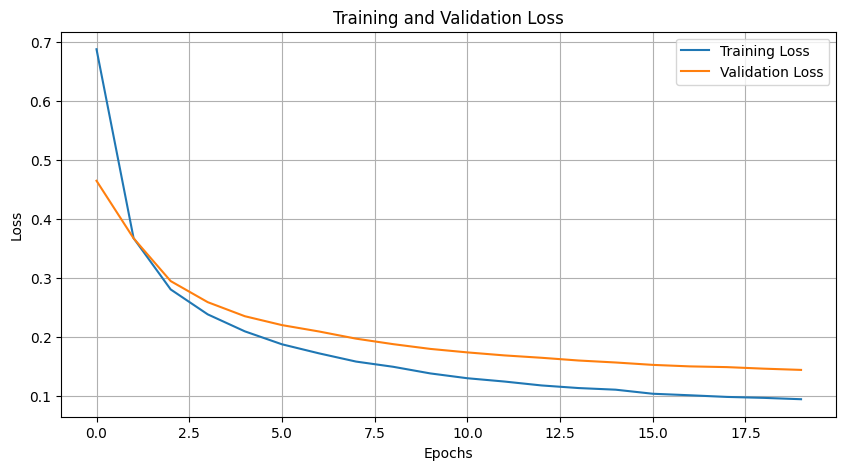

In [382]:


# Early Stopping Variables
import torch
import matplotlib.pyplot as plt

best_val_loss = float('inf')
patience_counter = 0
patience = 7
num_epochs = 20

# Lists to store losses for plotting
train_losses = []
val_losses = []

# Training the autoencoder with early stopping
for epoch in range(num_epochs):
    train_loss = train_epoch(autoencoder, train_loader, optimizer, criterion, device)
    val_loss = validate(autoencoder, val_loader, criterion, device)

    # Store the losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Check for improvement in validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset patience counter
        print("Validation loss improved. Saving model...")
        torch.save(autoencoder.state_dict(), 'best_autoencoder.pth')  # Save the best model weights
    else:
        patience_counter += 1

    # Early stopping check
    if patience_counter >= patience:
        print(f'Early stopping triggered after {epoch + 1} epochs.')
        break

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [383]:
train_recon_loss = compute_reconstruction_loss(autoencoder, train_loader, criterion, device)
val_recon_loss = compute_reconstruction_loss(autoencoder, val_loader, criterion, device)

print(f"Final Training Reconstruction Loss: {train_recon_loss:.4f}")
print(f"Final Validation Reconstruction Loss: {val_recon_loss:.4f}")

Final Training Reconstruction Loss: 0.0702
Final Validation Reconstruction Loss: 0.1440


In [384]:
dataset = torch.tensor(num_df_s.values, dtype=torch.float32).to(device)
encoder = autoencoder.encoder 
# Put encoder in evaluation mode
encoder.eval()

# Disable gradients for efficiency
with torch.no_grad():
    reduced_data = encoder(dataset)  # Get the latent space representation

# Convert back to Pandas DataFrame (optional)
reduced_df = pd.DataFrame(reduced_data.cpu().numpy())

# Display the transformed dataset
print(reduced_df.shape)  # Should be (num_samples, latent_dim)
print(reduced_df.head())

(2465, 512)
        0         1         2         3         4         5         6    \
0 -0.282347  0.108753 -0.233365  1.305229 -0.017013 -0.670689 -0.141795   
1 -0.381703 -0.904446  0.456687  1.428805  1.352979  0.666346 -0.582417   
2 -0.158970 -1.171462 -0.963045  1.438225  0.297642  0.005727 -0.312176   
3 -1.524076 -0.064008  0.578834  1.160119  0.112547  1.396066 -0.355374   
4 -0.009948  1.688626 -0.907299  1.618506 -2.384170 -0.013670  0.622251   

        7         8         9    ...       502       503       504       505  \
0 -1.916654  0.313526  1.356831  ...  0.825074  0.836821 -0.531084 -0.719762   
1 -1.364258  0.058625  0.464028  ...  0.219094 -0.197331 -0.652177 -1.174588   
2 -0.717541 -0.123568  1.075807  ... -0.343616  0.121837 -0.134834 -0.198513   
3 -1.010963  1.167617  0.946757  ... -0.122537  1.761279  0.307284  0.549933   
4 -2.104117  2.804691 -0.680986  ...  3.346127 -2.013019  0.294465 -1.041534   

        506       507       508       509       510     

In [385]:
reduced_data=pd.DataFrame(reduced_df)

In [386]:
reduced_data

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.282347,0.108753,-0.233365,1.305229,-0.017013,-0.670689,-0.141795,-1.916654,0.313526,1.356831,...,0.825074,0.836821,-0.531084,-0.719762,0.412428,-0.444902,0.261230,0.043741,1.063447,-1.765603
1,-0.381703,-0.904446,0.456687,1.428805,1.352979,0.666346,-0.582417,-1.364258,0.058625,0.464028,...,0.219094,-0.197331,-0.652177,-1.174588,0.289428,0.067755,-0.144743,1.379282,2.856292,-0.596827
2,-0.158970,-1.171462,-0.963045,1.438225,0.297642,0.005727,-0.312176,-0.717541,-0.123568,1.075807,...,-0.343616,0.121837,-0.134834,-0.198513,0.064093,-0.132594,-1.243032,0.688659,1.906085,-0.839250
3,-1.524076,-0.064008,0.578834,1.160119,0.112547,1.396066,-0.355374,-1.010963,1.167617,0.946757,...,-0.122537,1.761279,0.307284,0.549933,-0.423328,0.356414,-0.986841,0.535807,1.190833,-1.773300
4,-0.009948,1.688626,-0.907299,1.618506,-2.384170,-0.013670,0.622251,-2.104117,2.804691,-0.680986,...,3.346127,-2.013019,0.294465,-1.041534,0.843481,-0.869874,0.069276,-2.262544,0.067169,-2.071901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,0.331153,2.399055,0.417752,2.109199,-1.222535,0.002254,0.029314,-1.083649,1.458767,0.674662,...,1.497553,-2.059304,-1.099515,-2.415819,-1.256714,1.854514,1.055898,1.235214,0.199099,-1.077230
2461,0.694422,0.593436,-0.287508,1.000626,0.184645,-0.162758,-0.487729,-2.732217,-0.536251,-0.147502,...,0.781721,-1.364042,0.323158,0.453847,0.621061,-1.761012,1.631690,1.027721,-0.935018,0.251278
2462,0.679088,0.606144,-0.384261,1.147770,0.177294,0.047891,-0.446388,-2.741845,-0.571226,-0.188868,...,0.881512,-1.573020,0.543398,0.494605,0.683386,-1.813775,1.667106,1.198689,-1.226173,0.286431
2463,1.408637,0.086724,1.216714,0.152796,-0.373461,-0.481550,-0.215398,-1.655099,-1.280302,0.771715,...,-1.426721,0.089849,-1.092024,-0.844320,-0.423915,-0.894793,0.235180,0.215581,-0.152186,-1.133512


#### import seaborn as sns
reduced_df_s=scaler.fit_transform(reduced_df)
reduced_df_s=pd.DataFrame(reduced_df_s)
original_feature = num_df_s.iloc[:, 3]  
latent_feature = reduced_df_s.iloc[:,3]  

# Plot distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(original_feature, label='Original Feature', fill=True)
sns.kdeplot(latent_feature, label='Reduced Feature', fill=True)
plt.legend()
plt.title("Comparison of Original vs. Reduced Feature Distributions")
plt.show()


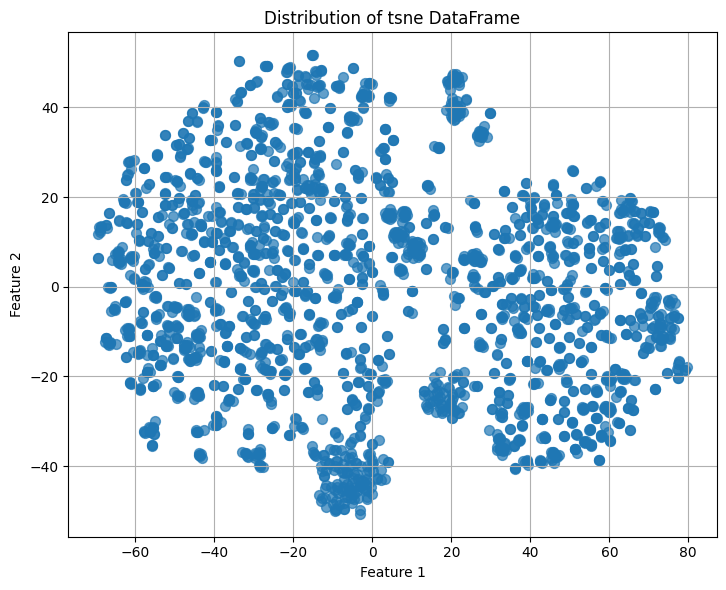

In [388]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(num_df_s)

# Convert t-SNE results to DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# Step 2: Visualize the distributions
plt.figure(figsize=(14, 6))

# Plot for reduced_df
plt.subplot(1, 2, 1)
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.7, s=50)
plt.title('Distribution of tsne DataFrame')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()

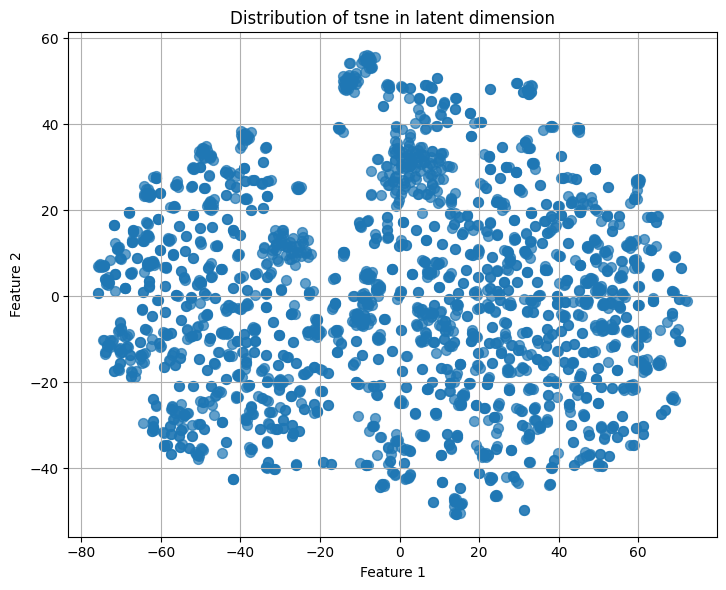

In [389]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(reduced_df)

# Convert t-SNE results to DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

# Step 2: Visualize the distributions
plt.figure(figsize=(14, 6))

# Plot for reduced_df
plt.subplot(1, 2, 1)
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.7, s=50)
plt.title('Distribution of tsne in latent dimension')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [391]:
reduced_df.var(axis=0).describe()

count    512.000000
mean       1.005568
std        0.289177
min        0.447476
25%        0.805559
50%        0.956610
75%        1.162072
max        2.203100
dtype: float64

In [396]:
reduced_df_s

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.140691,-0.083690,-0.463590,1.328914,-0.154215,-0.622863,-0.127487,-1.810916,0.494565,1.461262,...,1.002191,0.718397,-0.601598,-0.761511,0.312095,-0.393914,0.429633,-0.254787,0.795770,-1.360908
1,-0.251364,-1.285861,0.489185,1.473265,1.169268,0.657005,-0.763974,-1.295718,0.247933,0.534980,...,0.411235,-0.160705,-0.720970,-1.267786,0.176904,0.137075,0.029314,1.432594,2.356616,-0.366535
2,-0.003260,-1.602678,-1.471080,1.484268,0.149758,0.024633,-0.373606,-0.692552,0.071652,1.169699,...,-0.137524,0.110610,-0.210982,-0.181300,-0.070763,-0.070438,-1.053679,0.560030,1.529369,-0.572784
3,-1.523860,-0.288673,0.657836,1.159410,-0.029054,1.355526,-0.436005,-0.966215,1.320945,1.035810,...,0.078074,1.504252,0.224850,0.651810,-0.606491,0.436056,-0.801056,0.366910,0.906673,-1.367457
4,0.162737,1.790845,-1.394110,1.694856,-2.441010,0.006065,0.976191,-1.985755,2.904905,-0.652969,...,3.460738,-1.704168,0.212213,-1.119681,0.785868,-0.834084,0.240353,-3.168649,-0.071586,-1.621502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,0.542691,2.633777,0.435426,2.268038,-1.318812,0.021308,0.119683,-1.034006,1.602648,0.753513,...,1.657996,-1.743514,-1.161948,-2.649424,-1.522472,1.987728,1.213233,1.250572,0.043272,-0.775253
2461,0.947339,0.491392,-0.538347,0.973105,0.040597,-0.136649,-0.627195,-2.571558,-0.327642,-0.099481,...,0.959913,-1.152492,0.240499,0.544855,0.541405,-1.757088,1.781005,0.988417,-0.944087,0.355017
2462,0.930258,0.506469,-0.671937,1.144985,0.033495,0.064994,-0.567478,-2.580537,-0.361482,-0.142398,...,1.057229,-1.330138,0.457607,0.590223,0.609907,-1.811738,1.815928,1.204425,-1.197565,0.384925
2463,1.742908,-0.109827,1.538576,-0.017251,-0.498562,-0.441810,-0.233808,-1.566973,-1.047553,0.854204,...,-1.193776,0.083418,-1.154564,-0.900160,-0.607136,-0.859894,0.403946,-0.037676,-0.262556,-0.823137


In [397]:
reduced_df_s.to_csv('reduced_std_features.csv')